<a href="https://colab.research.google.com/github/TetianaZabolotko/MLtrainings/blob/main/Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regresion

Normal Equation
$$ θ^{̂} = (X^T⋅X)^{-1}⋅X^{T}⋅y $$

<function matplotlib.pyplot.show(*args, **kw)>

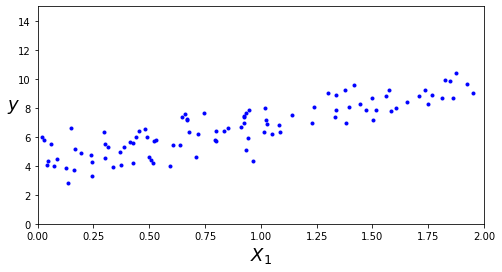

In [24]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)
#Create an array of the given shape and populate it with random samples 
#from a uniform distribution over [0, 1). 
y = 4 + 3*X + np.random.randn(100,1) # Gaussian noise
# Return a sample (or samples) from the “standard normal” distribution.
# For random samples from the normal distribution with mean mu and standard deviation 
#sigma, use: sigma * np.random.randn(...) + mu


plt.figure(figsize=(8,4))
plt.plot(X,y,'b.')
#plt.legend('top right')
plt.xlabel('$X_1$', fontsize =18)
plt.ylabel('$y$', rotation=0, fontsize =18)
plt.axis([0,2,0,15])
plt.show




In [25]:
X_b = np.c_[np.ones((100,1)), X]
y.shape
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.200783  ],
       [2.72135665]])

Predictions using $ θ^̂ $ :

In [26]:
X_new  = np.array([[0], [2]])
X_new.shape

(2, 1)

In [27]:
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.200783  ],
       [9.64349629]])

The actual function that we used to generate the data is $ y = 4 + 3x_0 + $ Gaussian noise.

$$y = \begin{pmatrix}
    1 & 0\\
    1 & 2 
\end{pmatrix}  · \begin{pmatrix}
    4.08\\
    2.94 
\end{pmatrix}$$

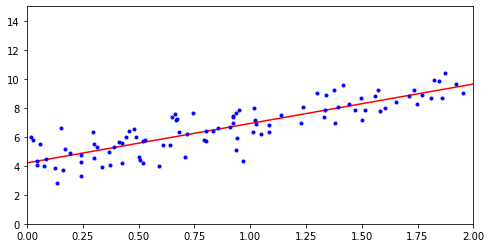

In [28]:
plt.figure(figsize=(8,4))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.200783]), array([[2.72135665]]))

In [30]:
lin_reg.predict(X_new)

array([[4.200783  ],
       [9.64349629]])